# TASK #1: IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

# TASK #2: DIVIDING DATASETS INTO TRAINING AND TESTING VARIABLES

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train= train['features'], train['labels']
X_validation, y_validation= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

1

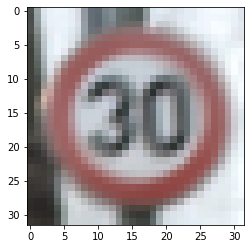

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

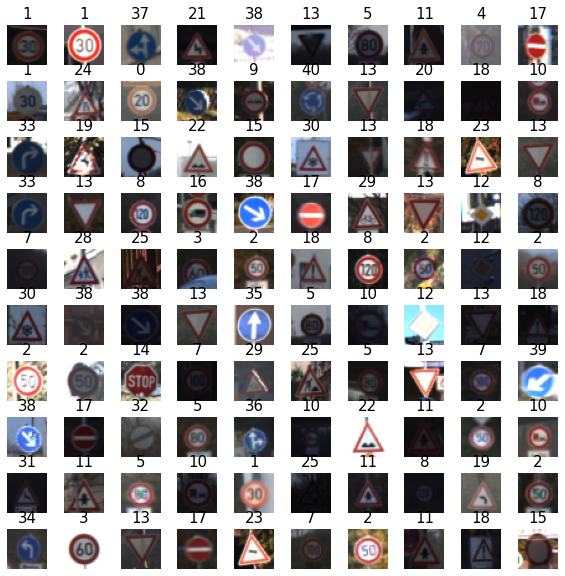

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index=np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)
        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray=np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray=np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray=np.sum(X_validation/3, axis=3, keepdims=True)

In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128

In [12]:
X_train_gray_norm

array([[[[ 0.94270833],
         [ 0.734375  ],
         [ 0.59635417],
         ...,
         [ 0.6328125 ],
         [ 0.63020833],
         [ 0.62239583]],

        [[ 0.984375  ],
         [ 0.95052083],
         [ 0.74479167],
         ...,
         [ 0.625     ],
         [ 0.62760417],
         [ 0.62239583]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.80729167],
         ...,
         [ 0.61979167],
         [ 0.62239583],
         [ 0.6171875 ]],

        ...,

        [[ 0.63541667],
         [ 0.6328125 ],
         [ 0.6328125 ],
         ...,
         [ 0.63802083],
         [ 0.63541667],
         [ 0.6328125 ]],

        [[ 0.64583333],
         [ 0.63541667],
         [ 0.63020833],
         ...,
         [ 0.6171875 ],
         [ 0.61979167],
         [ 0.63020833]],

        [[ 0.65885417],
         [ 0.640625  ],
         [ 0.63020833],
         ...,
         [ 0.609375  ],
         [ 0.609375  ],
         [ 0.61458333]]],


       [[[-0.69791667],


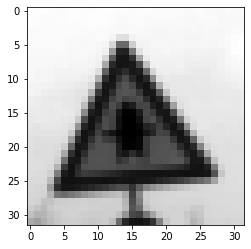

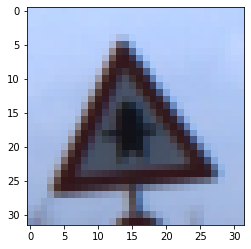

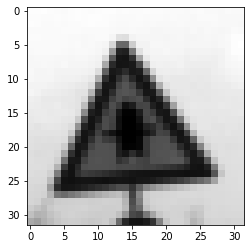

In [13]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow.keras import datasets, layers, models, layers
CNN=models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# TASK #6: COMPILE AND TRAIN DEEP CNN MODEL

In [15]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history=CNN.fit(X_train_gray_norm, y_train, batch_size=500, epochs=30, verbose=1,
                validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/30
70/70 [==============================] - 34s 458ms/step - loss: 3.1968 - accuracy: 0.1715 - val_loss: 2.7861 - val_accuracy: 0.2932
Epoch 2/30
70/70 [==============================] - 31s 440ms/step - loss: 1.9276 - accuracy: 0.4670 - val_loss: 1.5776 - val_accuracy: 0.5329
Epoch 3/30
70/70 [==============================] - 31s 445ms/step - loss: 1.2106 - accuracy: 0.6457 - val_loss: 1.1002 - val_accuracy: 0.6971
Epoch 4/30
70/70 [==============================] - 34s 489ms/step - loss: 0.8646 - accuracy: 0.7481 - val_loss: 0.8532 - val_accuracy: 0.7676
Epoch 5/30
70/70 [==============================] - 33s 476ms/step - loss: 0.6974 - accuracy: 0.8007 - val_loss: 0.7685 - val_accuracy: 0.7941
Epoch 6/30
70/70 [==============================] - 32s 463ms/step - loss: 0.5946 - accuracy: 0.8310 - val_loss: 0.7026 - val_accuracy: 0.8181
Epoch 7/30
70/70 [==============================] - 31s 445ms/step - loss: 0.5123 - accuracy: 0.8567 - val_loss: 0.6544 - val_accuracy: 0.8286

# TASK #7: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [17]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 9s 23ms/step - loss: 0.6054 - accuracy: 0.8910 1s - loss: 0.6098 - accuracy: 0.89 - ETA
Test Accuracy: 0.8909738659858704


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

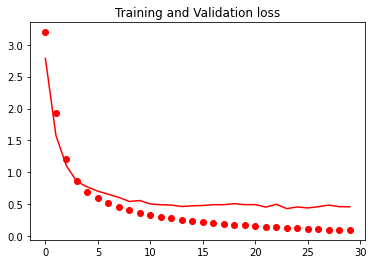

In [20]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

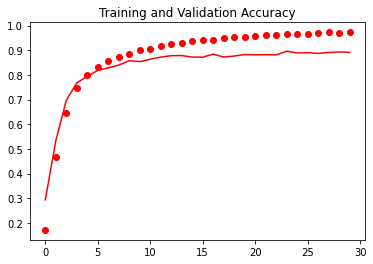

In [21]:
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

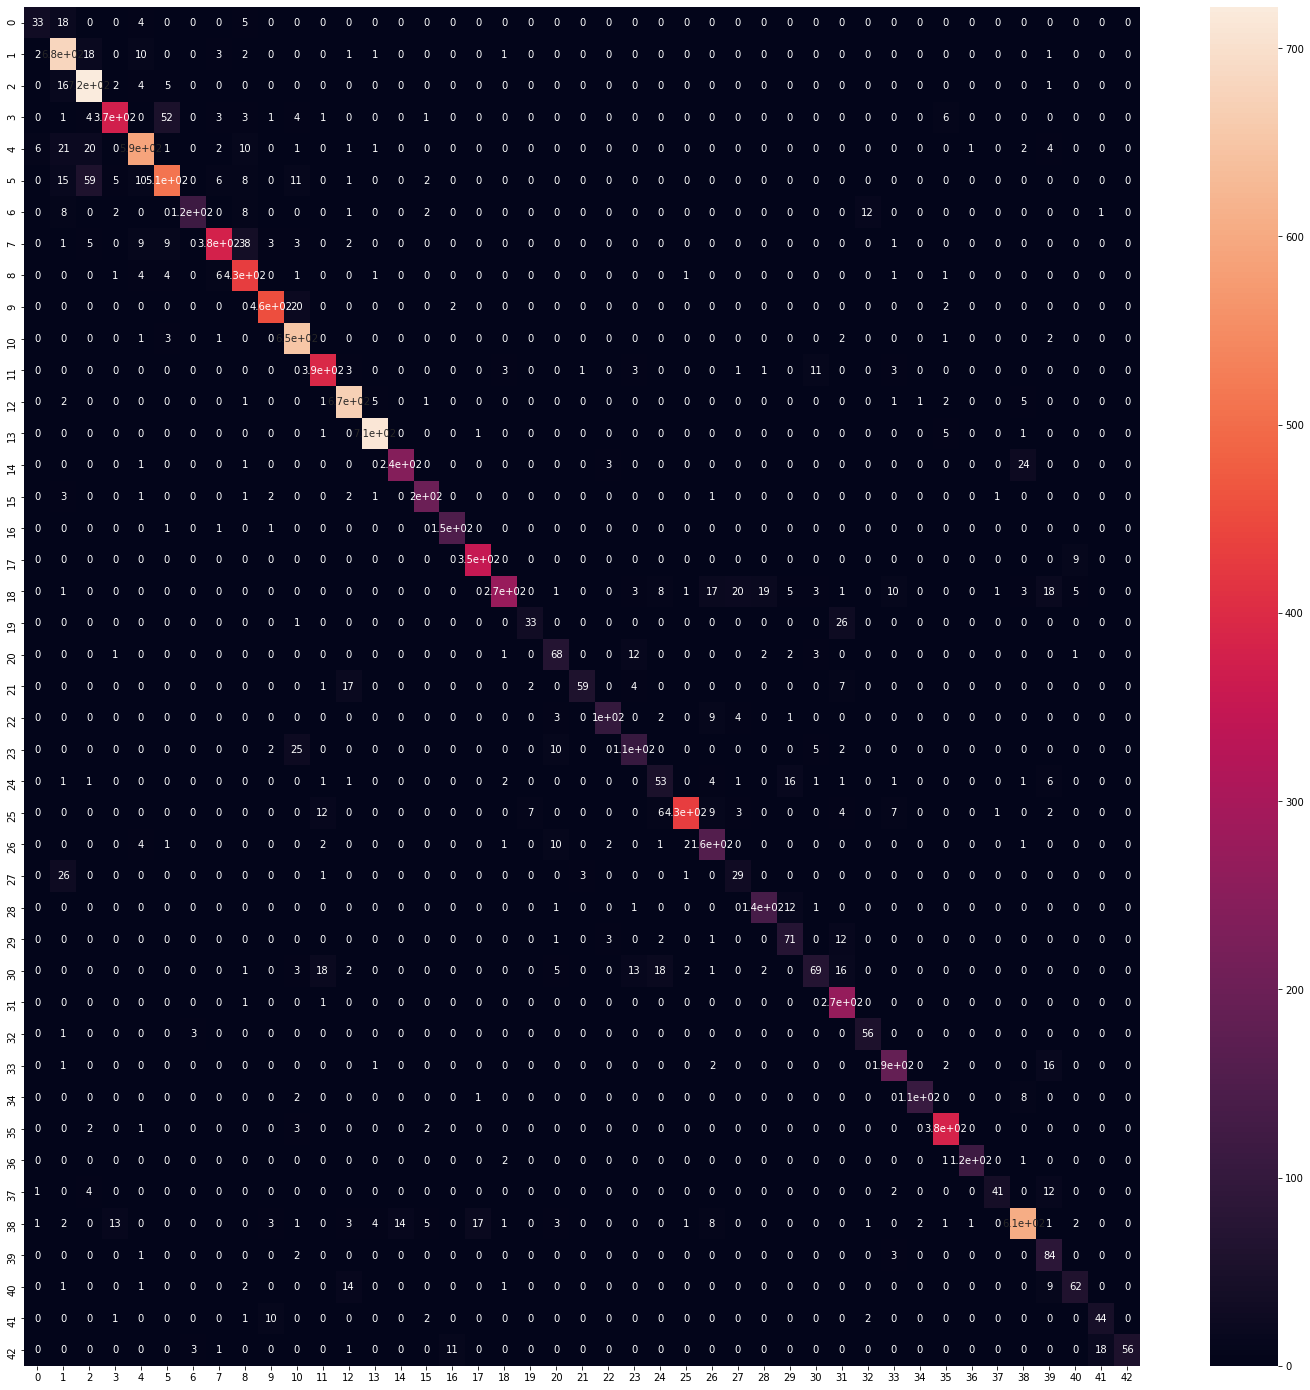

In [22]:
predicted_classes=CNN.predict(X_test_gray_norm).argmax(axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)
plt.show()

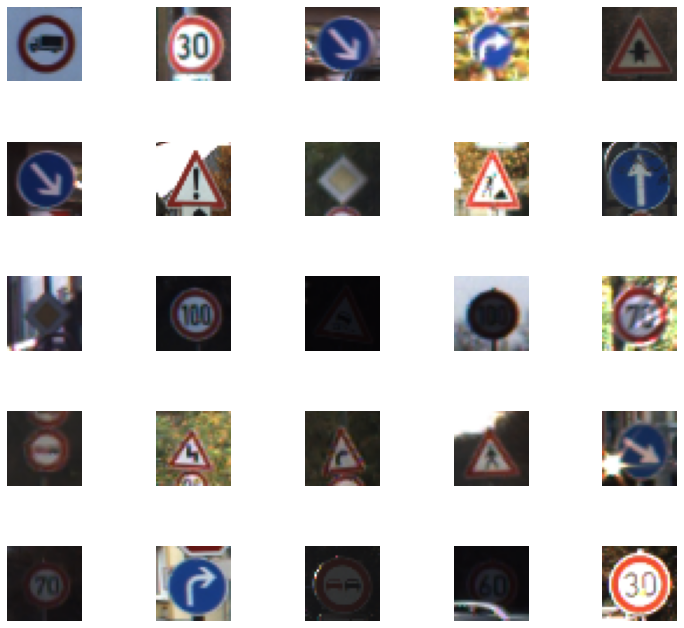

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    